In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename='/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/audio/fold2/98202-9-0-4.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

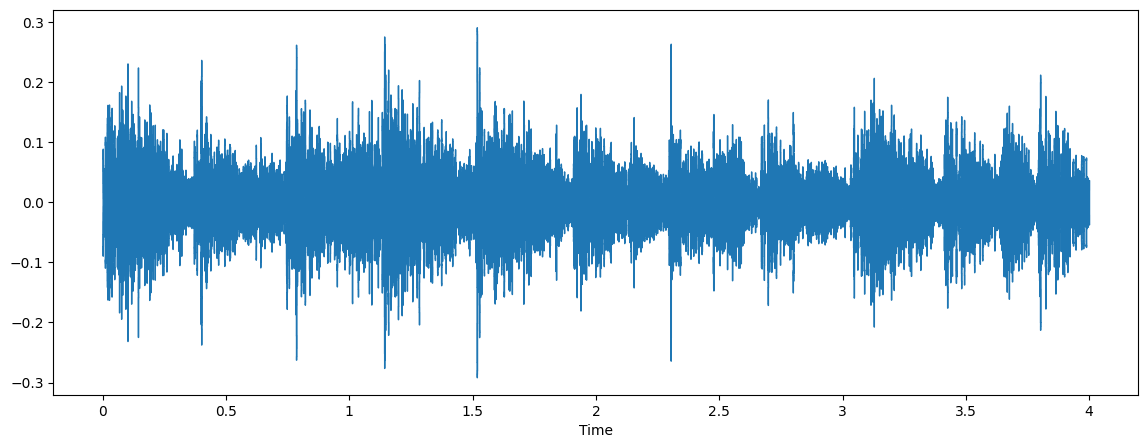

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)

librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

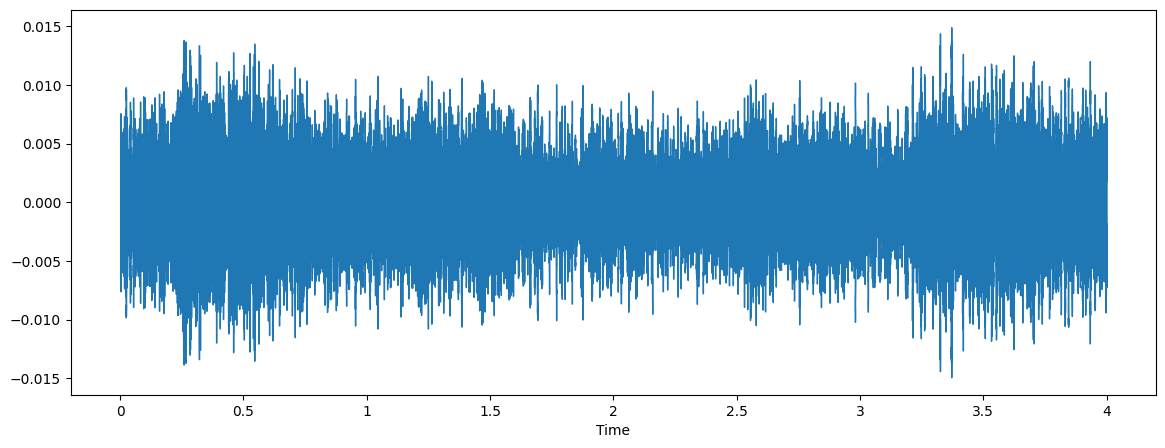

In [ ]:
### Sound
filename='/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/audio/fold5/100263-2-0-137.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio

array([[159, -52],
       [185, -16],
       [231,  40],
       ...,
       [156,  92],
       [164, 150],
       [169, 183]], dtype=int16)

In [ ]:
data

array([0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
       0.00508059], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


#### Audio Classification Data Preprocessing

In [ ]:
### Let's read a sample audio using librosa
audio_file_path='/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/audio/fold2/98202-9-0-4.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[-0.06003176 -0.08901006 -0.07238123 ... -0.01395772 -0.0083745
 -0.00389841]


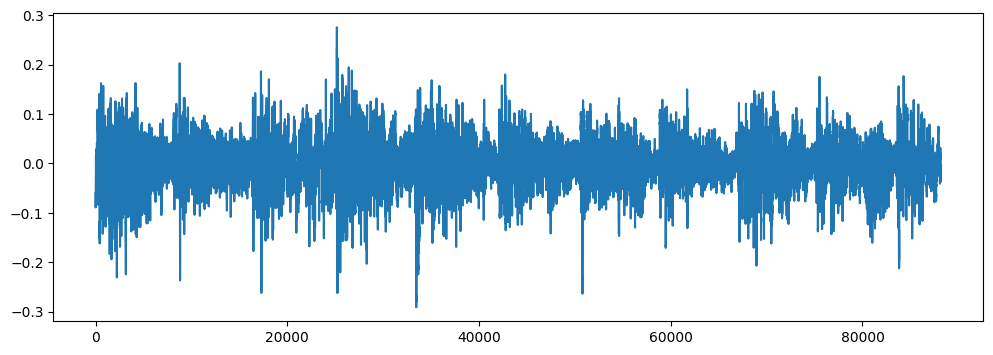

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[-275420928,  -95873792],
       [-272878848,  -91738624],
       [-268533248,  -86810368],
       ...,
       [ -47288320,   23125504],
       [ -45384960,   29342208],
       [ -40555264,   34408704]], dtype=int32)

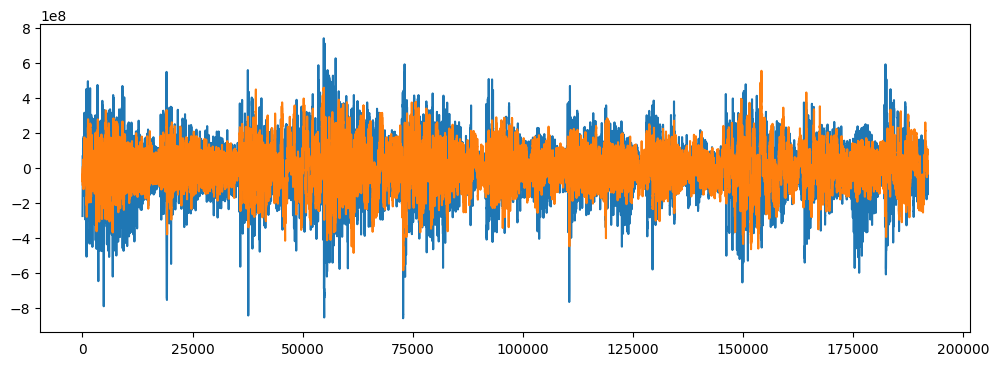

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-2.20949768e+02, -1.84097778e+02, -1.70318146e+02, ...,
        -2.63446014e+02, -2.71347900e+02, -2.94471985e+02],
       [ 1.19461044e+02,  1.22319229e+02,  1.16430397e+02, ...,
         1.27039948e+02,  1.25940491e+02,  1.28128052e+02],
       [ 1.63755417e+01,  4.97493267e+00, -1.23635073e+01, ...,
         2.16756058e+01,  2.34747200e+01,  2.20848656e+01],
       ...,
       [ 1.48888922e+00,  3.41969275e+00,  2.34358549e+00, ...,
        -2.21702337e-01,  3.01233482e+00,  4.17988348e+00],
       [ 6.31191611e-01, -1.40020704e+00, -1.17765903e+01, ...,
        -6.84257030e+00, -8.26441193e+00, -8.85671139e+00],
       [ 1.40364909e+00,  6.71536922e-01, -4.67686558e+00, ...,
         4.31507874e+00, -7.78138041e-01, -3.24116039e+00]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [ ]:
!pip install resampy



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tqdm import tqdm

# Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
#     data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])


8732it [00:01, 5635.55it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.0012501464, 0.00428795, 0.0062407875, 0.005...",dog_bark
1,"[0.0012501464, 0.00428795, 0.0062407875, 0.005...",children_playing
2,"[0.0012501464, 0.00428795, 0.0062407875, 0.005...",children_playing
3,"[0.0012501464, 0.00428795, 0.0062407875, 0.005...",children_playing
4,"[0.0012501464, 0.00428795, 0.0062407875, 0.005...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 88200)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059],
       [0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059],
       [0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059],
       ...,
       [0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059],
       [0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059],
       [0.00125015, 0.00428795, 0.00624079, ..., 0.00126011, 0.00257258,
        0.00508059]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape

(6985, 88200)

In [ ]:
X_test.shape

(1747, 88200)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

### Model Creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

# Update the file extension to '.keras'
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)

start = datetime.now()

# Training the model
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

# Calculate and print training duration
duration = datetime.now() - start
print("Training completed in time: ", duration)


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
prediction_feature.shape

In [ ]:
X_test[1]

In [ ]:
model.predict_classes(X_test)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [ ]:
filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class